Importing libraries

In [1085]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,f1_score,roc_auc_score


Loading Dataset

In [1008]:
hd= pd.read_csv('heart_disease_missing.csv')

In [1009]:
pd.set_option("display.max_rows", None)
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0
5,58,0,2,119.900334,339.874109,0,1.0,NaN,0,-0.080278,2.0,0,2.035667,1
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,1.903701,1
7,58,1,1,119.924599,284.008194,0,0.0,159.850624,0,1.718823,1.0,0,2.060892,0
8,57,1,0,140.080577,192.215185,0,1.0,148.025188,0,0.436121,1.0,0,0.931512,1
9,62,1,0,119.963981,267.062360,0,1.0,98.844968,1,1.740426,1.0,2,3.042729,0


In [1010]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.784610,244.133256,0.132075,0.560386,149.647978,0.344340,1.113106,1.423810,0.731132,2.349112,0.542453
std,9.145339,0.464130,1.022537,18.057222,46.444257,0.339374,0.535149,22.076206,0.476277,1.255908,0.623622,1.038762,0.602117,0.499374
min,29.000000,0.000000,0.000000,93.944184,126.085811,0.000000,0.000000,88.032613,0.000000,-0.185668,0.000000,0.000000,0.858554,0.000000
25%,47.000000,0.000000,0.000000,119.968114,211.969594,0.000000,0.000000,135.946808,0.000000,0.050778,1.000000,0.000000,1.949795,0.000000
50%,55.000000,1.000000,1.000000,130.010256,241.467023,0.000000,1.000000,151.939216,0.000000,0.726060,1.000000,0.000000,2.078759,1.000000
75%,61.000000,1.000000,2.000000,139.965470,272.484222,0.000000,1.000000,165.260092,1.000000,1.816733,2.000000,1.000000,2.970842,1.000000
max,77.000000,1.000000,3.000000,192.020200,406.932689,1.000000,2.000000,202.138041,1.000000,6.157114,2.000000,4.000000,3.277466,1.000000


Taking care of missing values as per the data cleaning step

In [1011]:
for col in ['restecg','slope']:
    hd[col].fillna(hd[col].mode()[0],inplace=True)
for col in ['trestbps','chol','thalach','thal']:
    hd[col].fillna(hd[col].mean(),inplace=True)
hd['oldpeak'] = hd['oldpeak'].fillna(hd['oldpeak'].median())
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,244.133256,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0
5,58,0,2,119.900334,339.874109,0,1.0,149.647978,0,-0.080278,2.0,0,2.035667,1
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,1.903701,1
7,58,1,1,119.924599,284.008194,0,0.0,159.850624,0,1.718823,1.0,0,2.060892,0
8,57,1,0,140.080577,192.215185,0,1.0,148.025188,0,0.436121,1.0,0,0.931512,1
9,62,1,0,119.963981,267.062360,0,1.0,98.844968,1,1.740426,1.0,2,3.042729,0


Rounding off the float values in 'thal'col as it is categorical

In [1012]:
hd['thal']=round(hd['thal'])
hd['thal']

0      2.0
1      3.0
2      2.0
3      2.0
4      3.0
5      2.0
6      2.0
7      2.0
8      1.0
9      3.0
10     2.0
11     2.0
12     3.0
13     3.0
14     3.0
15     3.0
16     3.0
17     3.0
18     3.0
19     2.0
20     3.0
21     2.0
22     3.0
23     2.0
24     2.0
25     2.0
26     3.0
27     3.0
28     2.0
29     2.0
30     3.0
31     2.0
32     3.0
33     2.0
34     2.0
35     3.0
36     1.0
37     2.0
38     2.0
39     2.0
40     2.0
41     2.0
42     3.0
43     2.0
44     2.0
45     3.0
46     3.0
47     2.0
48     2.0
49     3.0
50     2.0
51     2.0
52     3.0
53     2.0
54     2.0
55     2.0
56     2.0
57     3.0
58     2.0
59     1.0
60     3.0
61     3.0
62     2.0
63     3.0
64     3.0
65     3.0
66     2.0
67     2.0
68     3.0
69     1.0
70     1.0
71     1.0
72     2.0
73     3.0
74     3.0
75     3.0
76     2.0
77     3.0
78     2.0
79     2.0
80     2.0
81     3.0
82     3.0
83     2.0
84     2.0
85     3.0
86     2.0
87     2.0
88     3.0
89     3.0
90     2.0

In [1013]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.0,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.0,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.0,0
3,51,1,2,99.934001,244.133256,0,1.0,143.049207,1,1.195082,1.0,0,2.0,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,3.0,0
5,58,0,2,119.900334,339.874109,0,1.0,149.647978,0,-0.080278,2.0,0,2.0,1
6,63,0,2,134.926653,252.023252,0,0.0,171.840974,0,0.106792,2.0,0,2.0,1
7,58,1,1,119.924599,284.008194,0,0.0,159.850624,0,1.718823,1.0,0,2.0,0
8,57,1,0,140.080577,192.215185,0,1.0,148.025188,0,0.436121,1.0,0,1.0,1
9,62,1,0,119.963981,267.062360,0,1.0,98.844968,1,1.740426,1.0,2,3.0,0


Arranging categorical,numerical,binary and ordinal columns for better visualization

In [1014]:
hd=hd[['cp','restecg','slope','thal','ca','sex', 'fbs', 'exang','age', 'oldpeak', 'trestbps', 'chol', 'thalach','target']]
hd

,cp,restecg,slope,thal,ca,sex,fbs,exang,age,oldpeak,trestbps,chol,thalach,target
0,2,2.0,1.0,2.0,0,0,0,0,76,1.284822,140.102822,197.105970,115.952071,1
1,0,0.0,1.0,3.0,0,0,1,1,43,3.110483,132.079599,341.049462,135.970028,0
2,2,1.0,2.0,2.0,0,1,0,0,47,-0.023723,107.899290,242.822816,152.210039,0
3,2,1.0,1.0,2.0,0,1,0,1,51,1.195082,99.934001,244.133256,143.049207,1
4,0,1.0,1.0,3.0,1,1,0,1,57,3.082052,110.103508,334.952353,143.099327,0
5,2,1.0,2.0,2.0,0,0,0,0,58,-0.080278,119.900334,339.874109,149.647978,1
6,2,0.0,2.0,2.0,0,0,0,0,63,0.106792,134.926653,252.023252,171.840974,1
7,1,0.0,1.0,2.0,0,1,0,0,58,1.718823,119.924599,284.008194,159.850624,0
8,0,1.0,1.0,1.0,0,1,0,0,57,0.436121,140.080577,192.215185,148.025188,1
9,0,1.0,1.0,3.0,2,1,0,1,62,1.740426,119.963981,267.062360,98.844968,0


In [1015]:
X=hd.drop('target',axis=1)
Y=hd['target'].values
X

,cp,restecg,slope,thal,ca,sex,fbs,exang,age,oldpeak,trestbps,chol,thalach
0,2,2.0,1.0,2.0,0,0,0,0,76,1.284822,140.102822,197.105970,115.952071
1,0,0.0,1.0,3.0,0,0,1,1,43,3.110483,132.079599,341.049462,135.970028
2,2,1.0,2.0,2.0,0,1,0,0,47,-0.023723,107.899290,242.822816,152.210039
3,2,1.0,1.0,2.0,0,1,0,1,51,1.195082,99.934001,244.133256,143.049207
4,0,1.0,1.0,3.0,1,1,0,1,57,3.082052,110.103508,334.952353,143.099327
5,2,1.0,2.0,2.0,0,0,0,0,58,-0.080278,119.900334,339.874109,149.647978
6,2,0.0,2.0,2.0,0,0,0,0,63,0.106792,134.926653,252.023252,171.840974
7,1,0.0,1.0,2.0,0,1,0,0,58,1.718823,119.924599,284.008194,159.850624
8,0,1.0,1.0,1.0,0,1,0,0,57,0.436121,140.080577,192.215185,148.025188
9,0,1.0,1.0,3.0,2,1,0,1,62,1.740426,119.963981,267.062360,98.844968


In [1016]:
cats_ords=['cp','restecg','slope','thal']

One-hot encoding categorical data

In [1017]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cats_ords)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [1018]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,76.0,1.284822,140.102822,197.105970,115.952071
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,43.0,3.110483,132.079599,341.049462,135.970028
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,47.0,-0.023723,107.899290,242.822816,152.210039
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,51.0,1.195082,99.934001,244.133256,143.049207
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,57.0,3.082052,110.103508,334.952353,143.099327
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,58.0,-0.080278,119.900334,339.874109,149.647978
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,63.0,0.106792,134.926653,252.023252,171.840974
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,58.0,1.718823,119.924599,284.008194,159.850624
8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,57.0,0.436121,140.080577,192.215185,148.025188
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1.0,0.0,1.0,62.0,1.740426,119.963981,267.062360,98.844968


Splitting the data into training(80%) and testing set (20%)

In [1019]:
from sklearn.model_selection import train_test_split
X_train_entire,X_test,y_train_entire,y_test=train_test_split(X,Y,test_size=0.20,random_state=98)
print("Size of Training set is",X_train_entire.shape)
print("Size of Testing set and Y test set-",X_test.shape)

Size of Training set is (169, 22)
Size of Testing set and Y test set- (43, 22)


In [1020]:
X_train_entire

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
163,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,63.0,-0.087626,124.051766,196.957390,135.877150
155,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,46.0,-0.008399,101.106337,196.953211,155.911895
52,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,51.0,1.426575,139.929341,299.227526,172.884320
78,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,50.0,0.726060,110.098800,244.133256,158.896136
44,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,39.0,0.158195,93.954213,198.995522,179.029267
103,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,4.0,1.0,0.0,0.0,38.0,0.038206,138.127030,174.925633,173.028229
156,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,65.0,2.804510,131.784610,253.974040,127.029351
74,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,58.0,0.134932,100.035449,233.997115,155.864964
182,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,1.0,1.0,0.0,53.0,-0.133925,130.087649,245.940302,172.946768
188,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,1.0,0.0,1.0,67.0,1.562676,159.898064,285.869361,107.974829


In [1021]:
y_train_entire

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [1022]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
106,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,69.0,-0.041599,160.035681,234.031941,130.971758
85,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,57.0,0.049698,149.883586,126.085811,173.057882
98,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,59.0,0.128127,139.884269,221.037018,164.066347
133,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,0.0,0.0,52.0,0.985901,125.152471,211.954241,167.850104
193,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,41.0,-0.078278,111.904872,249.896449,178.946115
41,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,60.0,-0.032577,101.829267,317.872973,159.916455
83,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,43.0,1.554232,150.013416,247.050289,149.647978
122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,43.0,2.093012,130.048556,315.102352,149.647978
58,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,64.0,0.007978,139.958522,244.133256,157.852338
63,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,0.0,0.0,58.0,3.194206,131.894833,224.070003,172.930040


In [1023]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1],
      dtype=int64)

Feature Scaling-Only on numerical columns to bring them to standard scale as per data cleaning results

In [1075]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_entire.iloc[:, 17:] = sc.fit_transform(X_train_entire.iloc[:, 17:])
X_test.iloc[:, 17:] = sc.transform(X_test.iloc[:, 17:])


In [1025]:
X_train_entire

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
163,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.912858,-0.959947,-0.461642,-1.088719,-0.658689
155,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,-0.973934,-0.894691,-1.711296,-1.088814,0.271432
52,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,-0.418995,0.287234,0.403082,1.223526,1.059383
78,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.529983,-0.289749,-1.221548,-0.022111,0.409977
44,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-1.750848,-0.757474,-2.100815,-1.042639,1.344665
103,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,4.0,1.0,0.0,0.0,-1.861835,-0.856304,0.304925,-1.586840,1.066064
156,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.134833,1.422178,-0.040496,0.200381,-1.069451
74,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.357919,-0.776635,-1.769619,-0.251281,0.269253
182,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,1.0,1.0,0.0,-0.197020,-0.998080,-0.132916,0.018745,1.062282
188,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.0,1.0,0.0,1.0,1.356808,0.399334,1.490619,0.921508,-1.954065


In [1026]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
106,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.578784,-0.922036,1.498114,-0.250494,-0.886423
85,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.246931,-0.846838,0.945210,-2.691068,1.067441
98,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.468907,-0.782241,0.400628,-0.544298,0.650006
133,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,0.0,0.0,-0.308007,-0.075730,-0.401695,-0.749653,0.825668
193,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.528872,-0.952247,-1.123186,0.108190,1.340804
41,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.579894,-0.914605,-1.671924,1.645084,0.457345
83,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.306897,0.392380,0.952281,0.043841,-0.019373
122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,-1.306897,0.836148,-0.135045,1.582443,-0.019373
58,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.023845,-0.881201,0.404672,-0.022111,0.361518
63,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,1.0,0.0,0.0,0.357919,1.743154,-0.034493,-0.475725,1.061506


knn on default parameters

In [1027]:
knn = KNeighborsClassifier()
knn.fit(X_train_entire, y_train_entire)
y_pred = knn.predict(X_test)
accu_scores=(accuracy_score(y_test, y_pred)*100)
print("Accuracy for default parameters is ",accu_scores,"%")

Accuracy for default parameters is  86.04651162790698 %


Splitting the training dataset further into training(90%) and validation set(10%)

In [1028]:
X_train, X_val, y_train, y_val = train_test_split(X_train_entire, y_train_entire, 
                                                    test_size=0.1, 
                                                    random_state=98)
print("Size of Training set-",X_train.shape)
print("Size of Validation set -",X_val.shape)

Size of Training set- (152, 22)
Size of Validation set - (17, 22)


Performing knn over a range of k on validation set

In [1029]:
k=[1,5,10,15,20,25,30,35]

#to store accuracy values
a_scores=[]

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_val = knn.predict(X_val)
    a_scores.append(accuracy_score(y_val, y_pred_val)*100)
    
a_scores

[70.58823529411765,
 76.47058823529412,
 76.47058823529412,
 70.58823529411765,
 64.70588235294117,
 58.82352941176471,
 58.82352941176471,
 58.82352941176471]

Plotting the validation accuracy vs K values

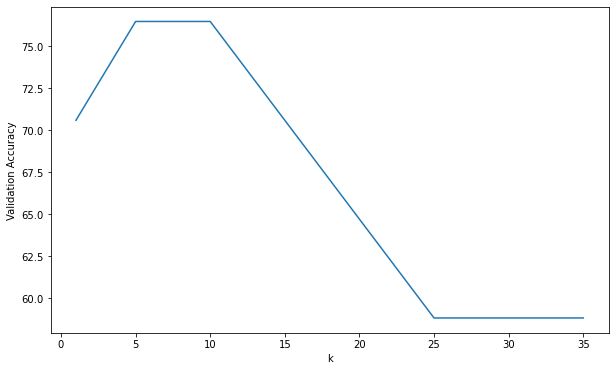

In [1030]:
plt.figure(figsize=(10,6))
plt.plot(k, a_scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

From the above graphs,lets choose K=15 as the best k value

Predicting on the test set using the entire training set with chosen k

In [1063]:
kNN = KNeighborsClassifier(n_neighbors=15)
kNN.fit(X_train_entire, y_train_entire)
y_pred = kNN.predict(X_test)
acc_scores=(accuracy_score(y_test, y_pred)*100)
acc_scores

83.72093023255815

Performance Analysis

In [1062]:
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[15,  2],
       [ 5, 21]], dtype=int64)

In [1032]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.91      0.81      0.86        26

    accuracy                           0.84        43
   macro avg       0.83      0.85      0.83        43
weighted avg       0.85      0.84      0.84        43



In [1033]:
print('Accuracy Score :',accuracy_score(y_test, y_pred)*100,'%') 
print('F1 Score :', f1_score(y_test, y_pred)) 
print('AUC : ', roc_auc_score(y_test, y_pred))

Accuracy Score : 83.72093023255815 %
F1 Score : 0.8571428571428572
AUC :  0.845022624434389


Weighted KNN on Validation set to improve model

Uniform-Manhattan

In [1048]:
knn = KNeighborsClassifier(n_neighbors=15,weights='uniform',p=1,metric='minkowski')
knn.fit(X_train, y_train)
y_pred_val = knn.predict(X_val)
print('Accuracy Score :',accuracy_score(y_val, y_pred_val)*100,'%')

Accuracy Score : 70.58823529411765 %


Uniform Euclidean

In [1049]:
knn = KNeighborsClassifier(n_neighbors=15,weights='uniform',p=2,metric='minkowski')
knn.fit(X_train, y_train)
y_pred_val = knn.predict(X_val)
print('Accuracy Score :',accuracy_score(y_val, y_pred_val)*100,'%')

Accuracy Score : 70.58823529411765 %


Distance-Manhattan

In [1050]:
knn = KNeighborsClassifier(n_neighbors=15,weights='distance',p=1,metric='minkowski')
knn.fit(X_train, y_train)
y_pred_val = knn.predict(X_val)
print('Accuracy Score :',accuracy_score(y_val, y_pred_val)*100,'%')

Accuracy Score : 76.47058823529412 %


Distance-Euclidean

In [1051]:
knn = KNeighborsClassifier(n_neighbors=15,weights='distance',p=2,metric='minkowski')
knn.fit(X_train, y_train)
y_pred_val = knn.predict(X_val)
print('Accuracy Score :',accuracy_score(y_val, y_pred_val)*100,'%')

Accuracy Score : 70.58823529411765 %


Experimenting with algorithm

Ball Tree

In [1082]:
#to compute execution time
%%time
knn = KNeighborsClassifier(n_neighbors=15,weights='distance',p=1,metric='minkowski',algorithm='ball_tree')
knn.fit(X_train, y_train)
y_pred_val1 = knn.predict(X_val)
print('Accuracy Score :',accuracy_score(y_val, y_pred_val1)*100,'%') 

Accuracy Score : 76.47058823529412 %
Wall time: 7.97 ms


KDTree

In [1083]:
%%time
knn = KNeighborsClassifier(n_neighbors=15,weights='distance',p=1,metric='minkowski',algorithm='kd_tree')
knn.fit(X_train, y_train)
y_pred_val = knn.predict(X_val)
print('Accuracy Score :',accuracy_score(y_val, y_pred_val1)*100,'%')

Accuracy Score : 76.47058823529412 %
Wall time: 9.91 ms


Brute

In [1084]:
%%time
knn = KNeighborsClassifier(n_neighbors=15,weights='distance',p=1,metric='minkowski',algorithm='brute')
knn.fit(X_train, y_train)
y_pred_val = knn.predict(X_val)
print('Accuracy Score :',accuracy_score(y_val, y_pred_val1)*100,'%')

Accuracy Score : 76.47058823529412 %
Wall time: 11 ms


Improved Model

In [1064]:
knn=KNeighborsClassifier(n_neighbors=15,weights='distance',p=1,metric='minkowski',algorithm='ball_tree')
knn.fit(X_train_entire,y_train_entire)
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [1065]:
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[15,  2],
       [ 3, 23]], dtype=int64)

In [1042]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.92      0.88      0.90        26

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.89      0.88      0.88        43



In [1043]:
print('Accuracy Score :',accuracy_score(y_test, y_pred)*100,'%') 
print('F1 Score :', f1_score(y_test, y_pred)) 
print('AUC : ', roc_auc_score(y_test, y_pred))

Accuracy Score : 88.37209302325581 %
F1 Score : 0.9019607843137256
AUC :  0.8834841628959276


Since all algorithm selections produced the same accuracy,used GridSearchCV as an additional step for hyperparameter tuning

In [1070]:
from sklearn.model_selection import GridSearchCV

grid_params={'algorithm':[ 'ball_tree', 'kd_tree', 'brute']}

gs=GridSearchCV(KNeighborsClassifier(),grid_params)
gs_results=gs.fit(X_train,y_train)

In [1071]:
gs_results.best_params_

{'algorithm': 'ball_tree'}